# This script demonstrates the k-means clustering algorithm

Name : Yeon-Jee Jung

Student ID : 20142052

Git URL : https://github.com/YeonjeeJung/assignment03

# Import packages for plotting graphs and manipulating data :

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

# Generate initial data :

There are n_points points per cluster, and n_cluster clusters.

Ouput type is pd.DataFrame.

In [2]:
def generatePointCluster(n_cluster, n_points):
    
    points_x = []
    points_y = []
    
    # There are center points for each cluster.
    # Points are in the range +2.0 or -2.0 from the center
    # The centers are in the range from 5.0 to -5.0
    for i in range(n_cluster):
        cen_pt = [random.uniform(-5.0, 5.0), random.uniform(-5.0, 5.0)]
        for j in range(n_points):
            points_x.append(random.uniform(-2.0,2.0)+cen_pt[0])
            points_y.append(random.uniform(-2.0,2.0)+cen_pt[1])
            
    # To make DataFrame
    data = {'x' : points_x,
           'y' : points_y,
           'cluster' : [None for i in range(n_cluster*n_points)]}
    data = pd.DataFrame(data)
    return data

Verify the function.

We can see the output type is pd.DataFrame like that.

  cluster         x         y
0    None -2.788161  1.919696
1    None -3.415619  1.278138
2    None -4.413059  1.206270
3    None -2.397015  0.084383
4    None -4.922433  0.006818


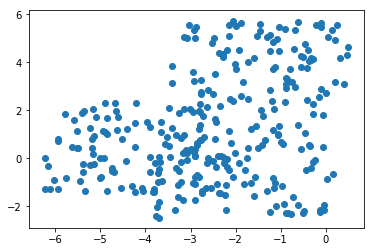

In [3]:
n_cluster = 3
data = generatePointCluster(n_cluster, 100)
print(data.head())
plt.scatter(data['x'],data['y'])

# Compute the distance of two points :

Since the data type is DataFrame, the input of the functions are Series data.

In [4]:
def computeDistance(a, b):
    return math.sqrt((a['x']-b['x'])**2 + (a['y']-b['y'])**2)

Verify the function.

Print the first and second data of the datasets, and compute the distance.

In [5]:
print("First data :")
print(data.loc[0],"\n")
print("Second data :")
print(data.loc[1],"\n")
print("Distance is ",computeDistance(data.loc[0],data.loc[1]))

First data :
cluster       None
x         -2.78816
y           1.9197
Name: 0, dtype: object 

Second data :
cluster       None
x         -3.41562
y          1.27814
Name: 1, dtype: object 

Distance is  0.8973846496293807


# Initialize labels :

Since we have no idea of the dataset, initialize labels with random clusters.

In [6]:
def initializeLabel(n_cluster):
    # For every data, assign cluster randomly
    for i in range(len(data)):
        rand = random.randrange(0, n_cluster)
        data.at[i, 'cluster'] = rand
    return

Verify the function.

We can see the cluster exists in the dataset.

And we can see they are in random.

  cluster         x         y
0       0 -2.788161  1.919696
1       2 -3.415619  1.278138
2       1 -4.413059  1.206270
3       0 -2.397015  0.084383
4       0 -4.922433  0.006818


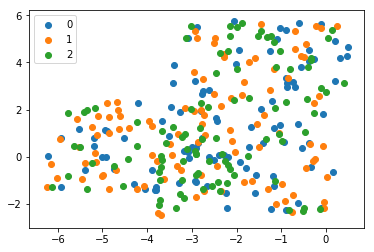

In [7]:
initializeLabel(n_cluster)
print(data.head())

# Show the scatter
for cluster in range(n_cluster):
    plt.scatter(data[data['cluster']==cluster]['x'], data[data['cluster']==cluster]['y'], label=cluster)
plt.legend()
plt.show()

# Compute center points of each clusters :

The return type is also pd.DataFrame.

In [8]:
def computeCentroid(n_cluster):
    
    # example : x[0] is for sum of 1st cluster's x axis
    x = [0 for i in range(n_cluster)]
    y = [0 for i in range(n_cluster)]
    
    # Compute sum of the points for each cluster
    for i in range(len(data)):
        c = data.loc[i,'cluster']
        x[c] += data.loc[i,'x']
        y[c] += data.loc[i,'y']
    
    # Get average for each points
    for cluster in range(n_cluster):
        num = len(data[data['cluster']==cluster])
        x[cluster] = x[cluster]/num
        y[cluster] = y[cluster]/num
        
    # Return type is pd.DataFrame
    center = {'x' : x,
             'y' : y}
    center = pd.DataFrame(center)
    return center

This function is for visualizing data.

It shows clusters and center points.

In [9]:
def showClusters(n_cluster):
    centers = computeCentroid(n_cluster)
    
    # Show clusters
    for cluster in range(n_cluster):
        plt.scatter(data[data['cluster']==cluster]['x'],data[data['cluster']==cluster]['y'], label=cluster)
        
    # Show center points
    for idx in range(len(centers)):
        plt.scatter(centers.loc[idx,'x'], centers.loc[idx,'y'], marker='*', label=str(idx)+' center', s=200)
        
    plt.legend()
    plt.show()

Verify the function.

We can see the center points as star mark.

centers :
          x         y
0 -2.301917  1.321488
1 -2.716372  1.154320
2 -2.530341  1.256475


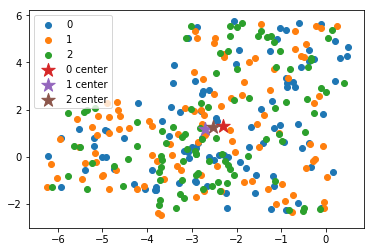

In [10]:
centers = computeCentroid(n_cluster)
print("centers :")
print(centers)
showClusters(n_cluster)

# Assign label with distance :

Select the new cluster.

In algorithm, the new cluster is having minimum distance between current point and cluster's center.

So, we have to select minimum distance.

In [11]:
def assignLabel(n_cluster, dist_list):
    return dist_list.index(min(dist_list))

# Compute Energy :

Our objective is to reduce energy.

The energy is average of distances of current point and current cluster's center point.

In [12]:
def computeEnergy(n_cluster):
    centers = computeCentroid(n_cluster)
    distsum = 0
    
    # For every point, calculate distance of current point and current cluster's center point
    for i in range(len(data)):
        cluster = data.loc[i,'cluster']
        dist = computeDistance(data.loc[i],centers.loc[cluster])
        distsum += dist
    return distsum / len(data)

Verify the function.

We run the algorithm until center points are not changed.

The graph is the final label and center points.

Energy : 2.557503307016291
Energy : 1.8811301095949198
Energy : 1.6500984052475347
Energy : 1.6028553392032896
Energy : 1.5540079850098463
Energy : 1.5016890673303769
Energy : 1.4749592957938078
Energy : 1.4412355754386776
Energy : 1.425759368829341
Energy : 1.423763065752131
Energy : 1.424133496403729
Energy : 1.4248031573346531
Energy : 1.425198394161691
Energy : 1.425720882895539
Energy : 1.4259280022220981


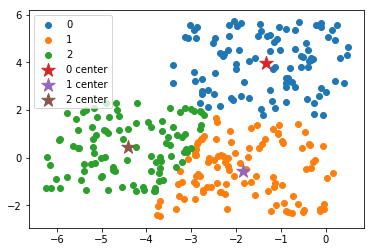

In [13]:
# Calculate initial energy
energy = []
erg = computeEnergy(n_cluster)
print('Energy :', erg)
energy.append(erg)

# Run the algorithm until center points are not changed
while(1):
    
    # For every data, compute new distance with centers, and assign new cluster
    for i in range(len(data)):
        dist_list = [computeDistance(data.loc[i],centers.loc[j]) for j in range(n_cluster)]
        new_cluster = assignLabel(n_cluster,dist_list)
        data.at[i,'cluster'] = new_cluster
        
    # Calculate new centers
    new_centers = computeCentroid(n_cluster)
    
    # If the center points are not changed, break
    if (centers.values == new_centers.values).all():
        break
        
    # Else, assign the new centers as centers
    centers = new_centers
    
    # Calculate energy
    erg = computeEnergy(n_cluster)
    print('Energy :', erg)
    energy.append(erg)
showClusters(n_cluster)

Plot the energy.

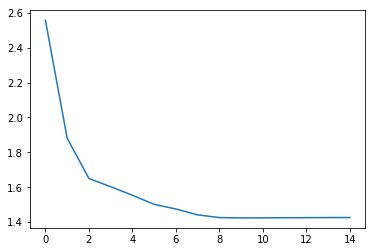

In [14]:
plt.plot(energy)